In [154]:
#import all required libraries 
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.python.framework import ops
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

In [155]:
#import data from the csv file
data = pd.read_csv('data.csv')

In [156]:
data.head()
# data.drop('Unnamed: 32', axis=1, inplace=True)
data.loc[data['diagnosis'] == 'M', 'diagnosis'] = 1
data.loc[data['diagnosis'] == 'B', 'diagnosis'] = 0

In [157]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [158]:
#Define X and Y values. Y specifies whether person will have a heardisease or not(0=NO, 1=Yes) and X is rest of the columns.
X_data = data.loc[:, 'radius_mean':'fractal_dimension_worst']
Y_data = data.loc[:, 'diagnosis']
print("Shape of X_data is: " + str(X_data.shape))
print("Shape of Y_data is: " + str(Y_data.shape))

Shape of X_data is: (569, 30)
Shape of Y_data is: (569,)


In [159]:
#Split dataset into 80%train and 20% test set and reshape Y_train and Y_test.
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2)
Y_train = Y_train.values.reshape(Y_train.shape[0], 1)
Y_test = Y_test.values.reshape(Y_test.shape[0], 1)
print("Shape of Y_train is: " + str(Y_train.shape))
print("Shape of Y_test is: " + str(Y_test.shape))

Shape of Y_train is: (455, 1)
Shape of Y_test is: (114, 1)


In [160]:
#assign number of train, test and input features to variables
m_train = X_train.shape[0]
m_test = X_test.shape[0]
num_features = X_train.shape[1]
print("Number of training samples: " + str(m_train))
print("Number of test samples: " + str(m_test))
print("Number of features: " + str(num_features))

Number of training samples: 455
Number of test samples: 114
Number of features: 30


In [161]:
#Taking the transpose to make life easier and converting Y values to one_hot format --> [0 1] = [[1 0]
#                                                                                               [0 1]]    
X_train=X_train.T
X_test=X_test.T
Y_train = convert_to_one_hot(Y_train, 2)
Y_test = convert_to_one_hot(Y_test, 2)
print("Shape of Transpose of X_train: " + str(X_train.shape))
print("Shape of Transpose of X_test: " + str(X_test.shape))
# print("Hot values of Y_train: " + str(Y_train))
# print("Hot values of Y_test: " + str(Y_test))

Shape of Transpose of X_train: (30, 455)
Shape of Transpose of X_test: (30, 114)


In [162]:
#Create Placeholders with number of features and number of output values fixed and number of training examples varying.
def create_placeholders(n_x, n_y):
    X = tf.placeholder(tf.float32, shape=[n_x, None], name="X")
    Y = tf.placeholder(tf.float32, shape=[n_y, None], name="Y")
    return X, Y

In [163]:
#call placeholder method with x and y dimension values
X, Y = create_placeholders(30, 2)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("X_1:0", shape=(30, ?), dtype=float32)
Y = Tensor("Y_1:0", shape=(2, ?), dtype=float32)


In [164]:
#Initializing the parameters. The following are the dimensions I used for the parameters:
#                        W1 : [25, 30]
#                        b1 : [25, 1]
#                        W2 : [12, 25]
#                        b2 : [12, 1]
#                        W3 : [1, 12]
#                        b3 : [1, 1]

def initialize_parameters():
    tf.set_random_seed(1) 
    W1 = tf.get_variable("W1", [25,30], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [12, 25], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b2 = tf.get_variable("b2", [12, 1], initializer=tf.zeros_initializer())
    W3 = tf.get_variable("W3", [2,12], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b3 = tf.get_variable("b3", [2, 1], initializer=tf.zeros_initializer())
    
    #Creating parmeters dictionary
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [165]:
#Call initialize parameters to check values of W1, b1, W2, b2
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))
    print("W3 = " + str(parameters["W3"]))
    print("b3 = " + str(parameters["b3"]))

W1 = <tf.Variable 'W1:0' shape=(25, 30) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>
W3 = <tf.Variable 'W3:0' shape=(2, 12) dtype=float32_ref>
b3 = <tf.Variable 'b3:0' shape=(2, 1) dtype=float32_ref>


In [169]:
#Forward Propagation
def forward_propagation(X, parameters):
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    Z1 = tf.add(tf.matmul(W1, X), b1)                                # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                              # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)                               # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                              # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)                               # Z3 = np.dot(W3,Z2) + b3
    return Z3

In [175]:
#Calling the function forward_propagation
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(30, 2)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)

In [171]:
#Compute cost
def compute_cost(Z3, Y):
# def compute_cost(Z2, Y):

    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
    return cost
    

In [172]:
#Calling compute cost function
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(30, 2)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    print("cost = " + str(cost))

cost = Tensor("Mean:0", shape=(), dtype=float32)


In [173]:
# Build the model. Call all the helper function created.
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001, num_epochs = 1500, print_cost = True):
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    #Create Placeholders
    X, Y = create_placeholders(n_x, n_y)

    #Initialize Parameters
    parameters = initialize_parameters()
    
    #Forward Propogation
    Z3 = forward_propagation(X, parameters)

    #Compute cost
    cost = compute_cost(Z3, Y)

    #Backpropagation: Due to tensorflow no need to compute each step. 
    #Just define the tensorflow optimizer. I am using an AdamOptimizer.
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    # Initialize all the variables
    init = tf.global_variables_initializer()
    
    #Starting the session
    with tf.Session() as sess:
        
        # Running the initialization
        sess.run(init)
        
        # Loop for number of epochs defined
        for epoch in range(num_epochs):

            epoch_cost = 0.                       # Defines a cost related to an epoch
            _, train_cost = sess.run([optimizer, cost], feed_dict={X: X_train, Y: Y_train})
            epoch_cost = train_cost

            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        # Calculate accuracy
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters   

Cost after epoch 0: 1.971543
Cost after epoch 100: 0.419691
Cost after epoch 200: 0.381097
Cost after epoch 300: 0.346045
Cost after epoch 400: 0.317676
Cost after epoch 500: 0.294794
Cost after epoch 600: 0.276553
Cost after epoch 700: 0.262439
Cost after epoch 800: 0.251706
Cost after epoch 900: 0.243395
Cost after epoch 1000: 0.236597
Cost after epoch 1100: 0.230626
Cost after epoch 1200: 0.225043
Cost after epoch 1300: 0.219618
Cost after epoch 1400: 0.214253


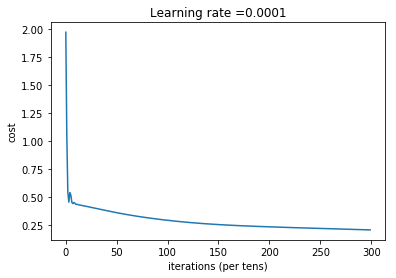

Parameters have been trained!
('Train Accuracy:', 0.9252747)
('Test Accuracy:', 0.9385965)


In [174]:
parameters = model(X_train, Y_train, X_test, Y_test)